<a href="https://colab.research.google.com/github/prijal-matc/takeovds41/blob/main/Bangaluru_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = '/content/bengaluru_house_prices.csv'
df_house = pd.read_csv(url)
df_house

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df_house.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df_house.shape

(13320, 9)

In [5]:
df_house.size

119880

In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df_house.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df_house.groupby('location').price.sum()

location
 Anekal                  16.00
 Banaswadi               35.00
 Basavangudi             50.00
 Bhoganhalli             22.89
 Devarabeesana Halli    749.00
                         ...  
t.c palya               160.00
tc.palya                243.00
vinayakanagar           200.00
white field,kadugodi    275.00
whitefiled               32.73
Name: price, Length: 1305, dtype: float64

In [11]:
df_house.groupby('location')['size'].sum()

location
 Anekal                                                 1 RK
 Banaswadi                                              1 RK
 Basavangudi                                            1 RK
 Bhoganhalli                                            1 RK
 Devarabeesana Halli          2 BHK3 BHK3 BHK3 BHK3 BHK2 BHK
                                        ...                 
t.c palya                                          6 Bedroom
tc.palya                2 Bedroom2 Bedroom2 Bedroom3 Bedroom
vinayakanagar                                          7 BHK
white field,kadugodi                               6 Bedroom
whitefiled                                             2 BHK
Name: size, Length: 1305, dtype: object

In [12]:
df_house.groupby('location')['area_type'].sum()

location
 Anekal                                                    Built-up  Area
 Banaswadi                                           Super built-up  Area
 Basavangudi                                         Super built-up  Area
 Bhoganhalli                                         Super built-up  Area
 Devarabeesana Halli    Super built-up  AreaSuper built-up  AreaBuilt-...
                                              ...                        
t.c palya                                                      Plot  Area
tc.palya                         Plot  AreaPlot  AreaPlot  AreaPlot  Area
vinayakanagar                                        Super built-up  Area
white field,kadugodi                                           Plot  Area
whitefiled                                           Super built-up  Area
Name: area_type, Length: 1305, dtype: object

In [13]:
df_house.groupby('location')['society'].sum()

location
 Anekal                                            0
 Banaswadi                                   Krntsee
 Basavangudi                                       0
 Bhoganhalli                                 Rosha I
 Devarabeesana Halli    Sorisa Sorisa Sorisa Sorisa 
                                    ...             
t.c palya                                          0
tc.palya                                           0
vinayakanagar                                      0
white field,kadugodi                               0
whitefiled                                         0
Name: society, Length: 1305, dtype: object

In [14]:
df_house.groupby('location')['availability'].sum()

location
 Anekal                                                     Ready To Move
 Banaswadi                                                  Ready To Move
 Basavangudi                                                Ready To Move
 Bhoganhalli                                                       19-Dec
 Devarabeesana Halli    Ready To MoveReady To MoveReady To MoveReady T...
                                              ...                        
t.c palya                                                   Ready To Move
tc.palya                                  18-AprReady To Move18-Apr18-Apr
vinayakanagar                                               Ready To Move
white field,kadugodi                                        Ready To Move
whitefiled                                                         20-Dec
Name: availability, Length: 1305, dtype: object

In [15]:
df_house.groupby('location')['total_sqft'].sum()

location
 Anekal                                      351
 Banaswadi                                   527
 Basavangudi                                 670
 Bhoganhalli                                 296
 Devarabeesana Halli    110016721750167017501296
                                  ...           
t.c palya                                   1350
tc.palya                         102088010001400
vinayakanagar                               1200
white field,kadugodi                        2100
whitefiled                                   935
Name: total_sqft, Length: 1305, dtype: object

In [16]:
df_house.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [20]:
df_house.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [22]:
df_house.groupby('location').price.agg(['max','min','mean'])

,max,min,mean
location,,,
Anekal,16.00,16.00,16.000000
Banaswadi,35.00,35.00,35.000000
Basavangudi,50.00,50.00,50.000000
Bhoganhalli,22.89,22.89,22.890000
Devarabeesana Halli,160.00,70.00,124.833333
...,...,...,...
t.c palya,160.00,160.00,160.000000
tc.palya,78.00,48.00,60.750000
vinayakanagar,200.00,200.00,200.000000


In [24]:
df_house.groupby('location').bath.agg(['max','min','mean'])

,max,min,mean
location,,,
Anekal,1.0,1.0,1.000000
Banaswadi,1.0,1.0,1.000000
Basavangudi,1.0,1.0,1.000000
Bhoganhalli,1.0,1.0,1.000000
Devarabeesana Halli,3.0,2.0,2.666667
...,...,...,...
t.c palya,6.0,6.0,6.000000
tc.palya,2.0,2.0,2.000000
vinayakanagar,5.0,5.0,5.000000


In [25]:
df_house.groupby('location').balcony.agg(['max','min','mean'])

,max,min,mean
location,,,
Anekal,1.0,1.0,1.0
Banaswadi,0.0,0.0,0.0
Basavangudi,1.0,1.0,1.0
Bhoganhalli,0.0,0.0,0.0
Devarabeesana Halli,3.0,1.0,2.0
...,...,...,...
t.c palya,3.0,3.0,3.0
tc.palya,1.0,1.0,1.0
vinayakanagar,2.0,2.0,2.0


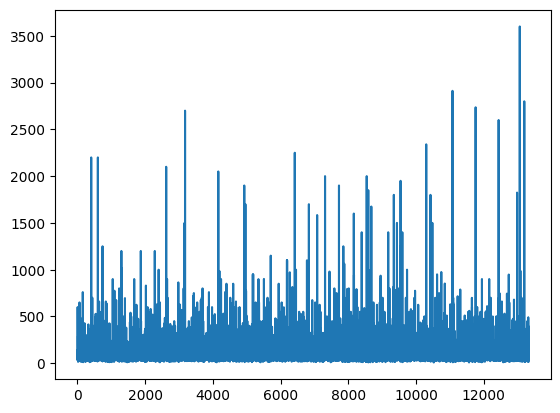

In [26]:
plt.plot(df_house.price)

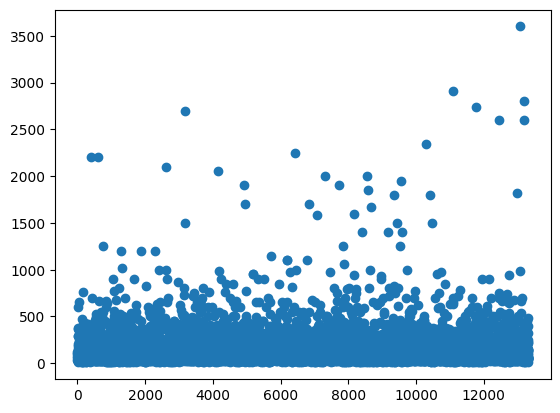

In [30]:
plt.scatter(df_house.index, df_house['price'])

<BarContainer object of 13320 artists>

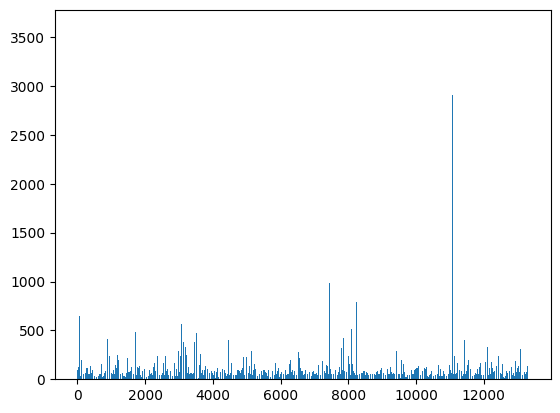

In [31]:
plt.bar(df_house.index, df_house['price'])